<a href="https://colab.research.google.com/github/qwertyqwertyqwertyqwerty123/colab_projects/blob/main/PSO_for_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Введите количество частиц: 15
Введите количество итераций: 40


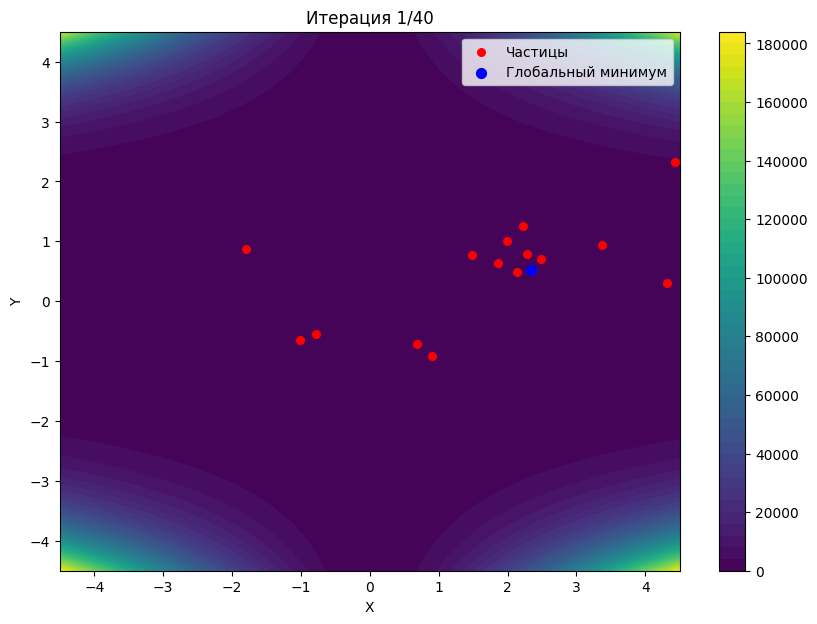

Итерация 1/40: Координаты = (x=2.3461, y=0.5167), значение функции = 0.7782
Итерация 2/40: Координаты = (x=2.9337, y=0.5096), значение функции = 0.0162
Итерация 3/40: Координаты = (x=2.9337, y=0.5096), значение функции = 0.0162
Итерация 4/40: Координаты = (x=2.9337, y=0.5096), значение функции = 0.0162
Итерация 5/40: Координаты = (x=3.0245, y=0.5094), значение функции = 0.0004
Итерация 6/40: Координаты = (x=3.0245, y=0.5094), значение функции = 0.0004
Итерация 7/40: Координаты = (x=3.0245, y=0.5094), значение функции = 0.0004
Итерация 8/40: Координаты = (x=3.0245, y=0.5094), значение функции = 0.0004
Итерация 9/40: Координаты = (x=3.0245, y=0.5094), значение функции = 0.0004
Итерация 10/40: Координаты = (x=3.0245, y=0.5094), значение функции = 0.0004
Итерация 11/40: Координаты = (x=3.0245, y=0.5094), значение функции = 0.0004
Итерация 12/40: Координаты = (x=3.0127, y=0.5039), значение функции = 0.0000
Итерация 13/40: Координаты = (x=3.0127, y=0.5039), значение функции = 0.0000
Итерация

In [ ]:
# Алгоритм роя частиц (Particle Swarm Optimization, PSO) для минимизации функции Била
import numpy as np
import matplotlib.pyplot as plt

# Функция Била
def beale(x, y):
    return (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2

# Параметры роя частиц
n_particles = int(input('Введите количество частиц: '))
n_iterations = int(input('Введите количество итераций: '))

# Параметры
w = 0.5  # инерция
c1 = 1.5  # когнитивная составляющая
c2 = 1.5  # социальная составляющая

# Случайная генерация позиций и скорости
x = np.random.uniform(-4.5, 4.5, n_particles)
y = np.random.uniform(-4.5, 4.5, n_particles)
vx = np.random.uniform(-1, 1, n_particles)
vy = np.random.uniform(-1, 1, n_particles)

# Лучшие позиции каждой частицы и глобальная лучшая позиция
p_best_x = np.copy(x) # Нач лучшая позиция по х
p_best_y = np.copy(y) # То же по y
p_best_val = beale(p_best_x, p_best_y) # Значение ф-ии в этой точке
g_best_x = p_best_x[np.argmin(p_best_val)] # Глобальная лучшая позиция по х
g_best_y = p_best_y[np.argmin(p_best_val)]
g_best_val = np.min(p_best_val) # Мин. значение ф-ии для всех частиц

# Сетка для построения поверхности
x_axis = np.linspace(-4.5, 4.5, 100)
y_axis = np.linspace(-4.5, 4.5, 100)
X, Y = np.meshgrid(x_axis, y_axis)
Z = beale(X, Y)

# График
fig, ax = plt.subplots(figsize=(10, 7))
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
ax.set_title('Визуализация работы:')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Основной цикл роя частиц
for iter in range(n_iterations):
    # Случайные коэффициенты для частиц
    r1 = np.random.rand(n_particles) # Генерация случ коэффициента r1
    r2 = np.random.rand(n_particles) # И соответственно r2

    # Обновление скорости и позиций частиц
    vx = w * vx + c1 * r1 * (p_best_x - x) + c2 * r2 * (g_best_x - x)
    vy = w * vy + c1 * r1 * (p_best_y - y) + c2 * r2 * (g_best_y - y)
    x += vx
    y += vy

    # Ограничение позиций частиц
    x = np.clip(x, -4.5, 4.5)
    y = np.clip(y, -4.5, 4.5)

    # Вычисление значений функции
    func_val = beale(x, y)

    # Обновление лучших позиций частиц (если значение ф-ии лучше, позиция обновляется)
    better_fit = func_val < p_best_val
    p_best_x[better_fit] = x[better_fit]
    p_best_y[better_fit] = y[better_fit]
    p_best_val[better_fit] = func_val[better_fit]

    # Обновление глобальной лучшей позиции (если тек значения лучше, обновляет лучшую позицию)
    if np.min(func_val) < g_best_val:
        g_best_x = x[np.argmin(func_val)]
        g_best_y = y[np.argmin(func_val)]
        g_best_val = np.min(func_val)

    # Очистка и обновление графика (после каждой итерации)
    ax.clear()
    contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax.scatter(x, y, color='red', s=30, label='Частицы')
    ax.scatter(g_best_x, g_best_y, color='blue', s=50, label='Глобальный минимум')
    ax.set_title(f'Итерация {iter + 1}/{n_iterations}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    plt.pause(0.7)

    # Вывод прогресса
    print(f"Итерация {iter + 1}/{n_iterations}: Координаты = (x={g_best_x:.4f}, y={g_best_y:.4f}), значение функции = {g_best_val:.4f}")

# Результаты
print("Найденный минимум функции:")
print(f"Координаты: ({g_best_x:.4f}, {g_best_y:.4f})")
print(f"Значение функции: {g_best_val:.4f}")
plt.show()

